In [ ]:
library(tidyverse)
library(readxl)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
alpha <- read_tsv(file="/content/final.opti_mcc.groups.ave-std.summary",
		col_types=cols(group = col_character())) %>%
	filter(method=='ave') %>%
	select(group, sobs, shannon, invsimpson, coverage)
metadata <- read_excel(path="/content/aliyu_metadata.xlsx")
meta_alpha <- inner_join(metadata, alpha, by=c('sample'='group'))

#meta_alpha %>%
#	group_by(dx) %>%
#	summarize(summary(Body_WC))

In [ ]:
library(purrr)
library(broom)

meta_alpha %>%
	nest(data = -dx)

dx,data
<chr>,<list>
Untreated,"FecesDSS3 , FecesDSS3_2 , FecesDSS3_3 , FecesDSS3_4 , FecesDSS3_5 , 84.7583643122677, 71.8045112781955, 95.0943396226415, 94.5525291828794, 88.1422924901186, 6.8 , 6.5 , 7.4 , 6.8 , 7.3 , 120 , 60 , 50 , 70 , 103.4 , 3.33333333333333, 2.88888888888889, 2 , 2.88888888888889, 2.22222222222222, 3 , 3.33333333333333, 2 , 3.33333333333333, 3.33333333333333, 303.409 , 204.95 , 358.519 , 242.569 , 309.895 , 2.536917 , 2.093235 , 3.237654 , 2.278434 , 2.096286 , 4.229829 , 4.433008 , 10.459718 , 4.44434 , 3.125384 , 0.99906 , 0.999295 , 0.999031 , 0.999222 , 0.999109"
Normal,"FecesNC , FecesNC_2B, 108 , 108 , 9 , 9.3 , 70 , 40 , 0 , 0 , 0 , 0 , 314.845 , 302.877 , 2.395715 , 1.230441 , 3.138811 , 1.572223 , 0.999202 , 0.999165"
Treated,"FFP200 , FFP200_2 , FFP200_5 , FFP200_6 , FFP200_7 , FFP200_8 , NFP200 , NFP200_2 , NFP200_3 , NFP200_4 , NFP200_5 , NFP200_6 , 96.2962962962963 , 96.1538461538462 , 92 , 88.8888888888889 , 108 , 100 , 100 , 96.2962962962963 , 96.2962962962963 , 103.846153846154 , 96 , 96.1538461538462 , 9.6 , 9.2 , 8.6 , 9.5 , 10.7 , 10.1 , 9.4 , 9.3 , 10.1 , 9.3 , 9.3 , 9.4 , 80 , 30 , 50 , 70 , 40 , 50 , 40 , 50 , 60 , 40 , 80 , 40 , 2.66666666666667 , 1.33333333333333 , 1.11111111111111 , 1.77777777777778 , 0.666666666666667, 0.444444444444444, 0.444444444444444, 1.55555555555556 , 0.666666666666667, 0 , 2 , 2.22222222222222 , 1 , 1.66666666666667 , 0.333333333333333, 0.666666666666667, 0.666666666666667, 0.666666666666667, 1 , 1.33333333333333 , 1.33333333333333 , 0.666666666666667, 1.33333333333333 , 0 , 309.776 , 322.337 , 329.938 , 339.572 , 346.034 , 297.845 , 392.976 , 313.774 , 262.89 , 287 , 321.702 , 405.868 , 3.190308 , 3.378774 , 3.04527 , 2.960958 , 3.440987 , 2.748103 , 3.745669 , 3.309252 , 2.386234 , 3.073647 , 2.744511 , 3.542705 , 10.712156 , 12.621844 , 6.74066 , 8.720101 , 13.891108 , 6.97822 , 20.32049 , 11.406701 , 3.777426 , 9.517854 , 5.291952 , 17.730524 , 0.999105 , 0.999059 , 0.999127 , 0.999006 , 0.999099 , 0.999006 , 0.998826 , 0.999171 , 0.999322 , 0.999264 , 0.999191 , 0.998633"


In [ ]:
meta_alpha %>%
	nest(data = -dx) %>%
	mutate(summary_data=map(data, ~summary(.x$invsimpson) %>% tidy))

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `summary_data = map(data, ~summary(.x$invsimpson) %>% tidy)`.
Caused by warning:
! `tidy.summaryDefault()` is deprecated. Please use `skimr::skim()` instead.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


dx,data,summary_data
<chr>,<list>,<list>
Untreated,"FecesDSS3 , FecesDSS3_2 , FecesDSS3_3 , FecesDSS3_4 , FecesDSS3_5 , 84.7583643122677, 71.8045112781955, 95.0943396226415, 94.5525291828794, 88.1422924901186, 6.8 , 6.5 , 7.4 , 6.8 , 7.3 , 120 , 60 , 50 , 70 , 103.4 , 3.33333333333333, 2.88888888888889, 2 , 2.88888888888889, 2.22222222222222, 3 , 3.33333333333333, 2 , 3.33333333333333, 3.33333333333333, 303.409 , 204.95 , 358.519 , 242.569 , 309.895 , 2.536917 , 2.093235 , 3.237654 , 2.278434 , 2.096286 , 4.229829 , 4.433008 , 10.459718 , 4.44434 , 3.125384 , 0.99906 , 0.999295 , 0.999031 , 0.999222 , 0.999109","3.125384, 4.229829, 4.433008, 5.338456, 4.444340, 10.459718"
Normal,"FecesNC , FecesNC_2B, 108 , 108 , 9 , 9.3 , 70 , 40 , 0 , 0 , 0 , 0 , 314.845 , 302.877 , 2.395715 , 1.230441 , 3.138811 , 1.572223 , 0.999202 , 0.999165","1.572223, 1.963870, 2.355517, 2.355517, 2.747164, 3.138811"
Treated,"FFP200 , FFP200_2 , FFP200_5 , FFP200_6 , FFP200_7 , FFP200_8 , NFP200 , NFP200_2 , NFP200_3 , NFP200_4 , NFP200_5 , NFP200_6 , 96.2962962962963 , 96.1538461538462 , 92 , 88.8888888888889 , 108 , 100 , 100 , 96.2962962962963 , 96.2962962962963 , 103.846153846154 , 96 , 96.1538461538462 , 9.6 , 9.2 , 8.6 , 9.5 , 10.7 , 10.1 , 9.4 , 9.3 , 10.1 , 9.3 , 9.3 , 9.4 , 80 , 30 , 50 , 70 , 40 , 50 , 40 , 50 , 60 , 40 , 80 , 40 , 2.66666666666667 , 1.33333333333333 , 1.11111111111111 , 1.77777777777778 , 0.666666666666667, 0.444444444444444, 0.444444444444444, 1.55555555555556 , 0.666666666666667, 0 , 2 , 2.22222222222222 , 1 , 1.66666666666667 , 0.333333333333333, 0.666666666666667, 0.666666666666667, 0.666666666666667, 1 , 1.33333333333333 , 1.33333333333333 , 0.666666666666667, 1.33333333333333 , 0 , 309.776 , 322.337 , 329.938 , 339.572 , 346.034 , 297.845 , 392.976 , 313.774 , 262.89 , 287 , 321.702 , 405.868 , 3.190308 , 3.378774 , 3.04527 , 2.960958 , 3.440987 , 2.748103 , 3.745669 , 3.309252 , 2.386234 , 3.073647 , 2.744511 , 3.542705 , 10.712156 , 12.621844 , 6.74066 , 8.720101 , 13.891108 , 6.97822 , 20.32049 , 11.406701 , 3.777426 , 9.517854 , 5.291952 , 17.730524 , 0.999105 , 0.999059 , 0.999127 , 0.999006 , 0.999099 , 0.999006 , 0.998826 , 0.999171 , 0.999322 , 0.999264 , 0.999191 , 0.998633","3.777426, 6.918830, 10.115005, 10.642420, 12.939160, 20.320490"


In [ ]:
meta_alpha %>%
	nest(data = -dx) %>%
	mutate(summary_data=map(data, ~summary(.x$invsimpson) %>% tidy)) %>%
	unnest(cols=summary_data)

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `summary_data = map(data, ~summary(.x$invsimpson) %>% tidy)`.
Caused by warning:
! `tidy.summaryDefault()` is deprecated. Please use `skimr::skim()` instead.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


dx,data,minimum,q1,median,mean,q3,maximum
<chr>,<list>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Untreated,"FecesDSS3 , FecesDSS3_2 , FecesDSS3_3 , FecesDSS3_4 , FecesDSS3_5 , 84.7583643122677, 71.8045112781955, 95.0943396226415, 94.5525291828794, 88.1422924901186, 6.8 , 6.5 , 7.4 , 6.8 , 7.3 , 120 , 60 , 50 , 70 , 103.4 , 3.33333333333333, 2.88888888888889, 2 , 2.88888888888889, 2.22222222222222, 3 , 3.33333333333333, 2 , 3.33333333333333, 3.33333333333333, 303.409 , 204.95 , 358.519 , 242.569 , 309.895 , 2.536917 , 2.093235 , 3.237654 , 2.278434 , 2.096286 , 4.229829 , 4.433008 , 10.459718 , 4.44434 , 3.125384 , 0.99906 , 0.999295 , 0.999031 , 0.999222 , 0.999109",3.125384,4.229829,4.433008,5.338456,4.444340,10.459718
Normal,"FecesNC , FecesNC_2B, 108 , 108 , 9 , 9.3 , 70 , 40 , 0 , 0 , 0 , 0 , 314.845 , 302.877 , 2.395715 , 1.230441 , 3.138811 , 1.572223 , 0.999202 , 0.999165",1.572223,1.963870,2.355517,2.355517,2.747164,3.138811
Treated,"FFP200 , FFP200_2 , FFP200_5 , FFP200_6 , FFP200_7 , FFP200_8 , NFP200 , NFP200_2 , NFP200_3 , NFP200_4 , NFP200_5 , NFP200_6 , 96.2962962962963 , 96.1538461538462 , 92 , 88.8888888888889 , 108 , 100 , 100 , 96.2962962962963 , 96.2962962962963 , 103.846153846154 , 96 , 96.1538461538462 , 9.6 , 9.2 , 8.6 , 9.5 , 10.7 , 10.1 , 9.4 , 9.3 , 10.1 , 9.3 , 9.3 , 9.4 , 80 , 30 , 50 , 70 , 40 , 50 , 40 , 50 , 60 , 40 , 80 , 40 , 2.66666666666667 , 1.33333333333333 , 1.11111111111111 , 1.77777777777778 , 0.666666666666667, 0.444444444444444, 0.444444444444444, 1.55555555555556 , 0.666666666666667, 0 , 2 , 2.22222222222222 , 1 , 1.66666666666667 , 0.333333333333333, 0.666666666666667, 0.666666666666667, 0.666666666666667, 1 , 1.33333333333333 , 1.33333333333333 , 0.666666666666667, 1.33333333333333 , 0 , 309.776 , 322.337 , 329.938 , 339.572 , 346.034 , 297.845 , 392.976 , 313.774 , 262.89 , 287 , 321.702 , 405.868 , 3.190308 , 3.378774 , 3.04527 , 2.960958 , 3.440987 , 2.748103 , 3.745669 , 3.309252 , 2.386234 , 3.073647 , 2.744511 , 3.542705 , 10.712156 , 12.621844 , 6.74066 , 8.720101 , 13.891108 , 6.97822 , 20.32049 , 11.406701 , 3.777426 , 9.517854 , 5.291952 , 17.730524 , 0.999105 , 0.999059 , 0.999127 , 0.999006 , 0.999099 , 0.999006 , 0.998826 , 0.999171 , 0.999322 , 0.999264 , 0.999191 , 0.998633",3.777426,6.918830,10.115005,10.642420,12.939160,20.320490


In [ ]:
meta_alpha %>%
	nest(data = -dx) %>%
	mutate(summary_data=map(data, ~summary(.x$Stool_con) %>% tidy),
				N = map(data, ~nrow(.x))) %>%
	unnest(cols=c(summary_data, N)) %>%
	select(-data)

Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `summary_data = map(data, ~summary(.x$Stool_con) %>% tidy)`.
Caused by warning:
! `tidy.summaryDefault()` is deprecated. Please use `skimr::skim()` instead.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


dx,minimum,q1,median,mean,q3,maximum,N
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Untreated,2,2.2222222,2.888889,2.666667,2.888889,3.333333,5
Normal,0,0.0000000,0.000000,0.000000,0.000000,0.000000,2
Treated,0,0.6111111,1.222222,1.240741,1.833333,2.666667,12


Testing significance

Looking at those summary tables, it might be hard to decipher whether the diagnosis groups are significantly different from each other. We'd like to test these differences with a statistical test. One of the more important assumptions in most statistical analyses is whether the data are normally distributed. We can look at this question graphically with a few tools. The first we'll use is the qq plot which plots the normally distributed quartiles on the x axis and our observed values on the y-axis. If the data are normally distributed, then the points fall on a line. We can generate this plot using geom_qq and stat_qq_line

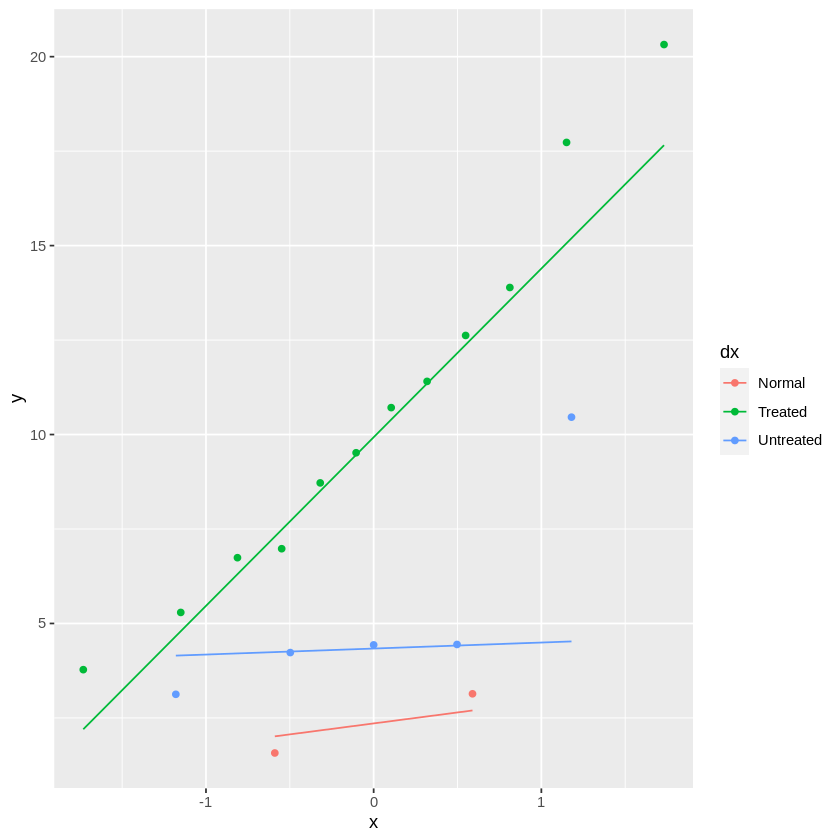

In [ ]:
ggplot(meta_alpha, aes(sample=invsimpson, group=dx, color=dx)) + geom_qq() + stat_qq_line()

We see from this qq plot that our data are not normally distributed. We can attempt to normalize the distributions by scaling invsimpson by raising it to a power. If the curve would hold water, then you should use a power between 0 and 1 and if it wouldn't hold water you would use a power above 1. Ours would not hold water so we'll try 2 or 3.

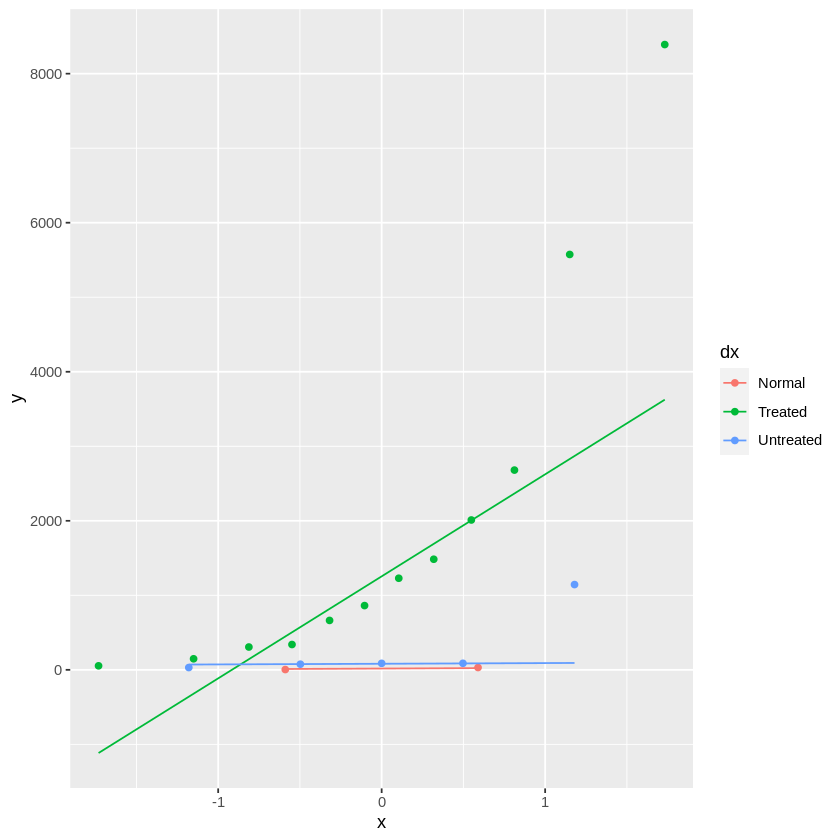

In [ ]:
meta_alpha <- mutate(meta_alpha, scaled_invsimpson=invsimpson^3)

ggplot(meta_alpha, aes(sample=scaled_invsimpson, group=dx, color=dx)) +
	geom_qq() + stat_qq_line()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


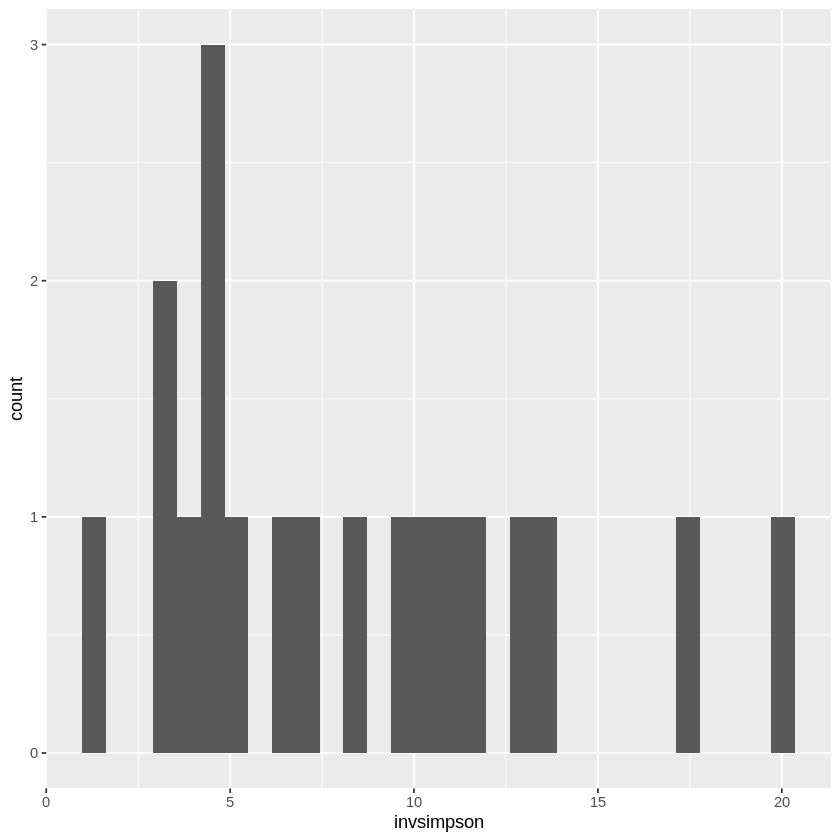

In [ ]:
ggplot(meta_alpha, aes(x=invsimpson)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


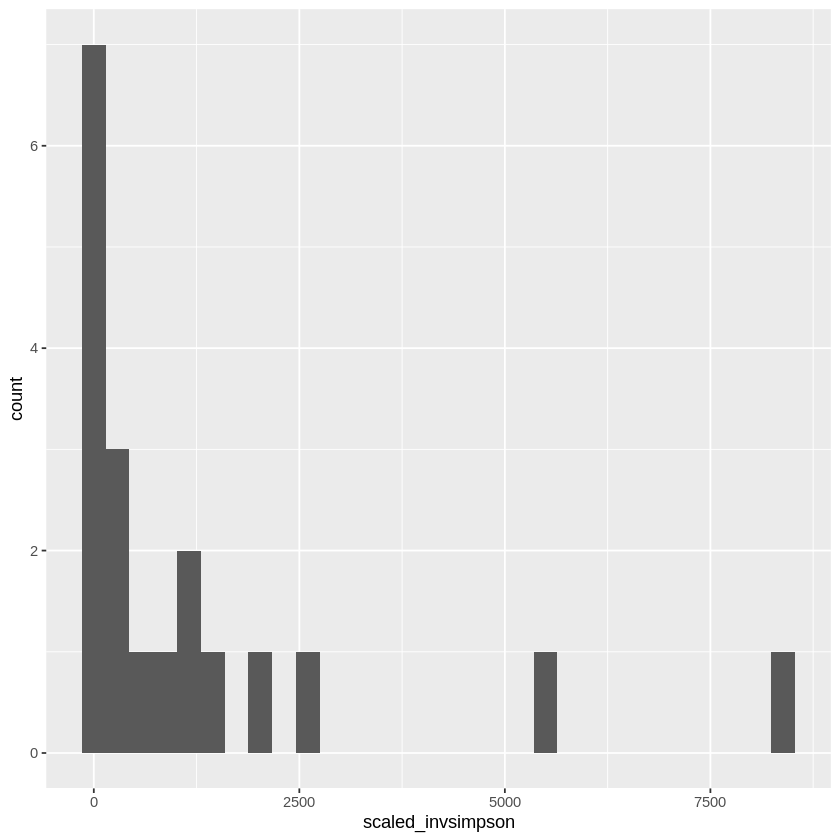

In [ ]:
ggplot(meta_alpha, aes(x=scaled_invsimpson)) + geom_histogram()

We can also run a shapiro.test. The null hypothesis is that the data are normally distributed so a small p-value would mean that the data are not normally distributed.

In [ ]:
meta_alpha %>% pull(invsimpson) %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.92591, p-value = 0.1455


In [ ]:
meta_alpha %>% pull(scaled_invsimpson) %>% shapiro.test()


	Shapiro-Wilk normality test

data:  .
W = 0.6449, p-value = 1.314e-05


In [ ]:
dx_invsimpson_aov <- aov(invsimpson~dx, data=meta_alpha)
summary(dx_invsimpson_aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
dx           2  180.3   90.13   4.751  0.024 *
Residuals   16  303.5   18.97                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The invsimpson~dx syntax is a bit different than anything we've seen before. It is a model specification that asks R to test for a relationship where groups explains invsimpson. It is commonly used with statistical modeling in R. We see that our P-value is 0.0181, which is less than 0.05. Now we could use Tukey's Honest Significant Difference (HSD) test [Note that this is a bad idea if your experiment-wise P-value is greater than 0.05].

In [ ]:
TukeyHSD(dx_invsimpson_aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = invsimpson ~ dx, data = meta_alpha)

$dx
                       diff         lwr        upr     p adj
Treated-Normal     8.286903  -0.2968482 16.8706536 0.0593002
Untreated-Normal   2.982939  -6.4200892 12.3859668 0.6972527
Untreated-Treated -5.303964 -11.2862550  0.6783273 0.0866680


 we would want to use a Kruskal-Wallis test using the kruskal.test function.

In [ ]:
kruskal.test(invsimpson~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  invsimpson by dx
Kruskal-Wallis chi-squared = 8.7332, df = 2, p-value = 0.01269


We use pairwise Wilcoxon rank sum tests with correction for multiple comparisons. [Note that this is a bad idea if your experiment-wise P-value is greater than 0.05]. Perhaps we'd like to capture the actual P-value from that line of code and save it as a variable. How would we do this? Let's re-run the command, but save the variable as output

In [ ]:
result <- kruskal.test(invsimpson~dx, data=meta_alpha)
result


	Kruskal-Wallis rank sum test

data:  invsimpson by dx
Kruskal-Wallis chi-squared = 8.7332, df = 2, p-value = 0.01269


In [ ]:
glimpse(result)

List of 5
 $ statistic: Named num 8.73
  ..- attr(*, "names")= chr "Kruskal-Wallis chi-squared"
 $ parameter: Named int 2
  ..- attr(*, "names")= chr "df"
 $ p.value  : num 0.0127
 $ method   : chr "Kruskal-Wallis rank sum test"
 $ data.name: chr "invsimpson by dx"
 - attr(*, "class")= chr "htest"


In [ ]:
result$p.value

[1] 0.0126946

In [ ]:
glimpse(dx_invsimpson_aov)

List of 13
 $ coefficients : Named num [1:3] 2.36 8.29 2.98
  ..- attr(*, "names")= chr [1:3] "(Intercept)" "dxTreated" "dxUntreated"
 $ residuals    : Named num [1:19] -1.109 -0.905 5.121 -0.894 -2.213 ...
  ..- attr(*, "names")= chr [1:19] "1" "2" "3" "4" ...
 $ effects      : Named num [1:19] -36.5 12.94 -3.57 -1.29 -2.61 ...
  ..- attr(*, "names")= chr [1:19] "(Intercept)" "dxTreated" "dxUntreated" "" ...
 $ rank         : int 3
 $ fitted.values: Named num [1:19] 5.34 5.34 5.34 5.34 5.34 ...
  ..- attr(*, "names")= chr [1:19] "1" "2" "3" "4" ...
 $ assign       : int [1:3] 0 1 1
 $ qr           :List of 5
  ..$ qr   : num [1:19, 1:3] -4.359 0.229 0.229 0.229 0.229 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. ..- attr(*, "assign")= int [1:3] 0 1 1
  .. ..- attr(*, "contrasts")=List of 1
  ..$ qraux: num [1:3] 1.23 1.24 1.16
  ..$ pivot: int [1:3] 1 2 3
  ..$ tol  : num 1e-07
  ..$ rank : int 3
  ..- attr(*, "class")= chr "qr"
 $ df.residual  : int 16
 $ contrasts    :List of 1
  

The P-value of result was less than 0.05, we might want to know which of the three groups were different from each other. We can test this with the pairwise.wilcox.test function

In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$invsimpson, p.adjust.method="BH")


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  meta_alpha$invsimpson and meta_alpha$dx 

          Normal Treated
Treated   0.04   -      
Untreated 0.19   0.04   

P value adjustment method: BH 

We are telling pairwise.wilcox.test to group our values from meta_alpha$invsimpson by meta_alpha$dx and to perform all possible pairwise Wilcoxon tests. Because this is fraught with an increased probability of Type I errors, we need to correct for multiple comparisons. As written, this is done using the Benjamini & Hochberg (BH) method. You can find other methods of correcting p-values by looking at ?p.adjust.methods.

Is the number of OTUs normally distributed? Repeat the analyses we performed above to see whether there is a significant difference in the number of OTUs by  group.

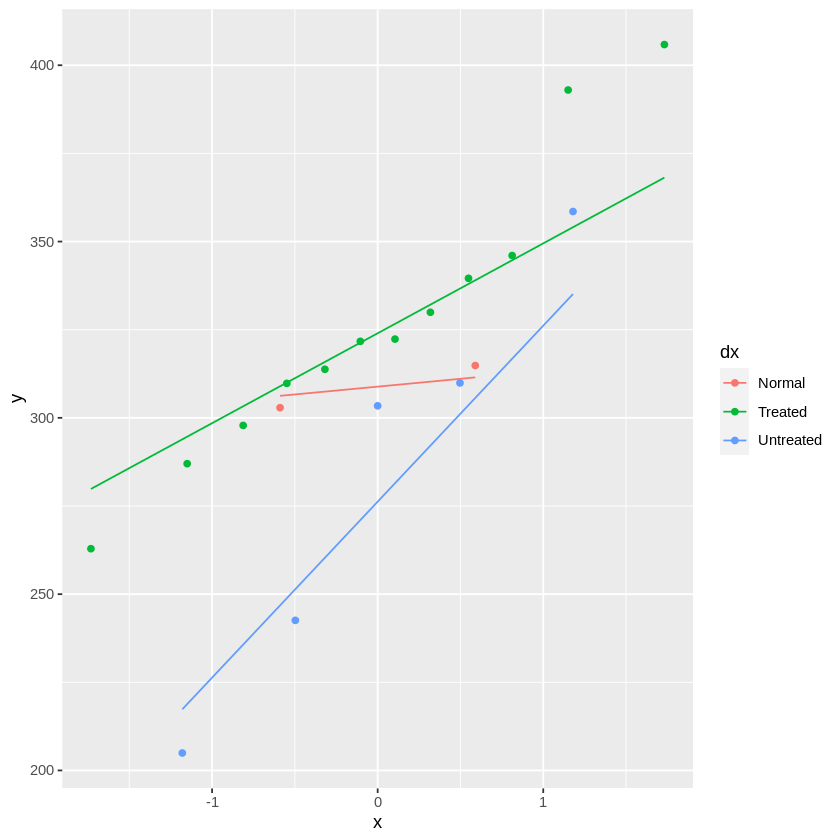

In [ ]:
ggplot(meta_alpha, aes(sample=sobs, group=dx, color=dx)) + geom_qq() + stat_qq_line()

The curve holds water so we might try transforming with the square root

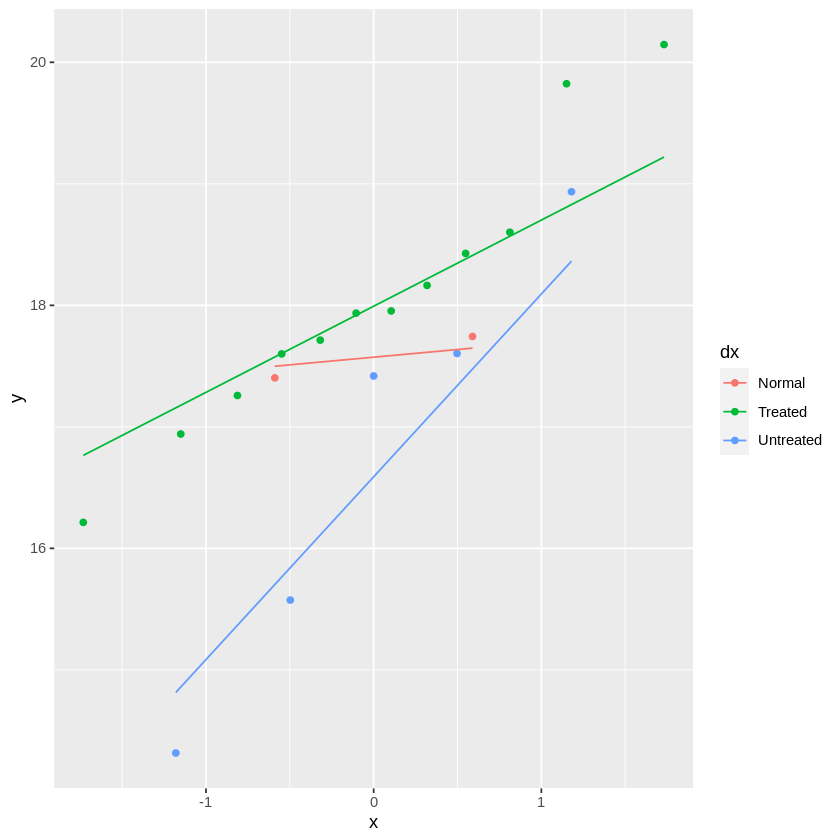

In [ ]:
meta_alpha <- mutate(meta_alpha, scaled_sobs=sobs^0.5)

ggplot(meta_alpha, aes(sample=scaled_sobs, group=dx, color=dx)) +
	geom_qq() + stat_qq_line()

In [ ]:
dx_sobs_aov <- aov(scaled_sobs~dx, data=meta_alpha)
summary(dx_sobs_aov)

            Df Sum Sq Mean Sq F value Pr(>F)
dx           2  5.945   2.973    1.77  0.202
Residuals   16 26.873   1.679               

Not significant

Is there a significant difference in the experiemntal UC mice clinical paramenter results by sample group?

In [ ]:
kruskal.test(Body_WC~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  Body_WC by dx
Kruskal-Wallis chi-squared = 10.798, df = 2, p-value = 0.00452


Yes, the P-value is quite small. Let's perform the pairwise Wilcoxon tests

In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$Body_WC, p.adjust.method="BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha$Body_WC and meta_alpha$dx 

          Normal Treated
Treated   0.079  -      
Untreated 0.079  0.021  

P value adjustment method: BH 

The three sample groups have significantly different Body weight change even after comparing for multiple comparisons.

In [ ]:
kruskal.test(Colon_length~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  Colon_length by dx
Kruskal-Wallis chi-squared = 11.669, df = 2, p-value = 0.002925


In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$Colon_length, p.adjust.method="BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha$Colon_length and meta_alpha$dx 

          Normal Treated
Treated   0.1952 -      
Untreated 0.1180 0.0054 

P value adjustment method: BH 

In [ ]:
kruskal.test(Spleen_weight~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  Spleen_weight by dx
Kruskal-Wallis chi-squared = 3.9223, df = 2, p-value = 0.1407


In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$Spleen_weight, p.adjust.method="BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha$Spleen_weight and meta_alpha$dx 

          Normal Treated
Treated   1.00   -      
Untreated 0.65   0.16   

P value adjustment method: BH 

In [ ]:
kruskal.test(Stool_con~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  Stool_con by dx
Kruskal-Wallis chi-squared = 10.789, df = 2, p-value = 0.004542


In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$Stool_con, p.adjust.method="BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha$Stool_con and meta_alpha$dx 

          Normal Treated
Treated   0.076  -      
Untreated 0.076  0.021  

P value adjustment method: BH 

In [ ]:
kruskal.test(Fecal_b~dx, data=meta_alpha)


	Kruskal-Wallis rank sum test

data:  Fecal_b by dx
Kruskal-Wallis chi-squared = 12.991, df = 2, p-value = 0.00151


In [ ]:
pairwise.wilcox.test(g=meta_alpha$dx, x=meta_alpha$Fecal_b, p.adjust.method="BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha$Fecal_b and meta_alpha$dx 

          Normal Treated
Treated   0.068  -      
Untreated 0.068  0.005  

P value adjustment method: BH 

Comparing continuous by continuous variables

In [ ]:
cor.test(meta_alpha$invsimpson, meta_alpha$Body_WC)


	Pearson's product-moment correlation

data:  meta_alpha$invsimpson and meta_alpha$Body_WC
t = 0.86105, df = 17, p-value = 0.4012
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2753499  0.6026757
sample estimates:
      cor 
0.2044263 


In [ ]:
cor.test(meta_alpha$Stool_con, meta_alpha$Fecal_b)


	Pearson's product-moment correlation

data:  meta_alpha$Stool_con and meta_alpha$Fecal_b
t = 4.195, df = 17, p-value = 0.0006081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3830795 0.8817650
sample estimates:
      cor 
0.7131942 


In [ ]:
cor.test(meta_alpha$Body_WC, meta_alpha$Stool_con)


	Pearson's product-moment correlation

data:  meta_alpha$Body_WC and meta_alpha$Stool_con
t = -4.8935, df = 17, p-value = 0.000137
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9046998 -0.4758006
sample estimates:
       cor 
-0.7647397 


In [ ]:
cor.test(meta_alpha$Body_WC, meta_alpha$Spleen_weight)


	Pearson's product-moment correlation

data:  meta_alpha$Body_WC and meta_alpha$Spleen_weight
t = -2.1385, df = 17, p-value = 0.04729
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.756437515 -0.007852534
sample estimates:
       cor 
-0.4604196 


In [ ]:
cor.test(meta_alpha$Body_WC, meta_alpha$Colon_length)


	Pearson's product-moment correlation

data:  meta_alpha$Body_WC and meta_alpha$Colon_length
t = 3.9091, df = 17, p-value = 0.001129
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3400974 0.8702684
sample estimates:
      cor 
0.6880239 


In [ ]:
cor.test(meta_alpha$invsimpson, meta_alpha$Body_WC)


	Pearson's product-moment correlation

data:  meta_alpha$invsimpson and meta_alpha$Body_WC
t = 0.86105, df = 17, p-value = 0.4012
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2753499  0.6026757
sample estimates:
      cor 
0.2044263 


We see that invsimpson diversity has a significant positive correlation with BWC, albeit a small correlation (R=0.168). To explore this correlation a bit further, we can fit a regression line through the data using the lm (i.e. linear model) function

In [ ]:
lm_invsimpson_Body_WC <- lm(invsimpson~Body_WC, data=meta_alpha)
summary(lm_invsimpson_Body_WC)


Call:
lm(formula = invsimpson ~ Body_WC, data = meta_alpha)

Residuals:
   Min     1Q Median     3Q    Max 
-8.285 -3.442 -1.024  2.625 11.436 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -3.2719    13.5785  -0.241    0.812
Body_WC       0.1216     0.1412   0.861    0.401

Residual standard error: 5.222 on 17 degrees of freedom
Multiple R-squared:  0.04179,	Adjusted R-squared:  -0.01458 
F-statistic: 0.7414 on 1 and 17 DF,  p-value: 0.4012


In [ ]:
lm_invsimpson_Body_WC <- lm(invsimpson~Body_WC + dx, data=meta_alpha)
summary(lm_invsimpson_Body_WC)


Call:
lm(formula = invsimpson ~ Body_WC + dx, data = meta_alpha)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6178 -2.4774 -0.1466  1.6421  9.1610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -19.9302    18.6126  -1.071   0.3012  
Body_WC       0.2063     0.1700   1.214   0.2437  
dxTreated    10.4547     3.7336   2.800   0.0135 *
dxUntreated   7.3430     5.0800   1.445   0.1689  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.293 on 15 degrees of freedom
Multiple R-squared:  0.4287,	Adjusted R-squared:  0.3144 
F-statistic: 3.752 on 3 and 15 DF,  p-value: 0.03422


We see that the impact of treatment is significant, but that there's no meaningful difference between the 2 other groups.

By default, cor.test performs a Pearson correlation, which assumes a linear relationship between the two variables. Having seen the FIT result distribution a few times now, we might suspect that it has a non-linear association with other variables. We can test the association with a Spearman correlation.

In [ ]:
cor.test(meta_alpha$invsimpson, meta_alpha$Body_WC, method="spearman")

Warning message in cor.test.default(meta_alpha$invsimpson, meta_alpha$Body_WC, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  meta_alpha$invsimpson and meta_alpha$Body_WC
S = 903.96, p-value = 0.395
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2070505 


We can plot these associations on our scatter plots with the geom_smooth function and giving it the linear model method (i.e. lm)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


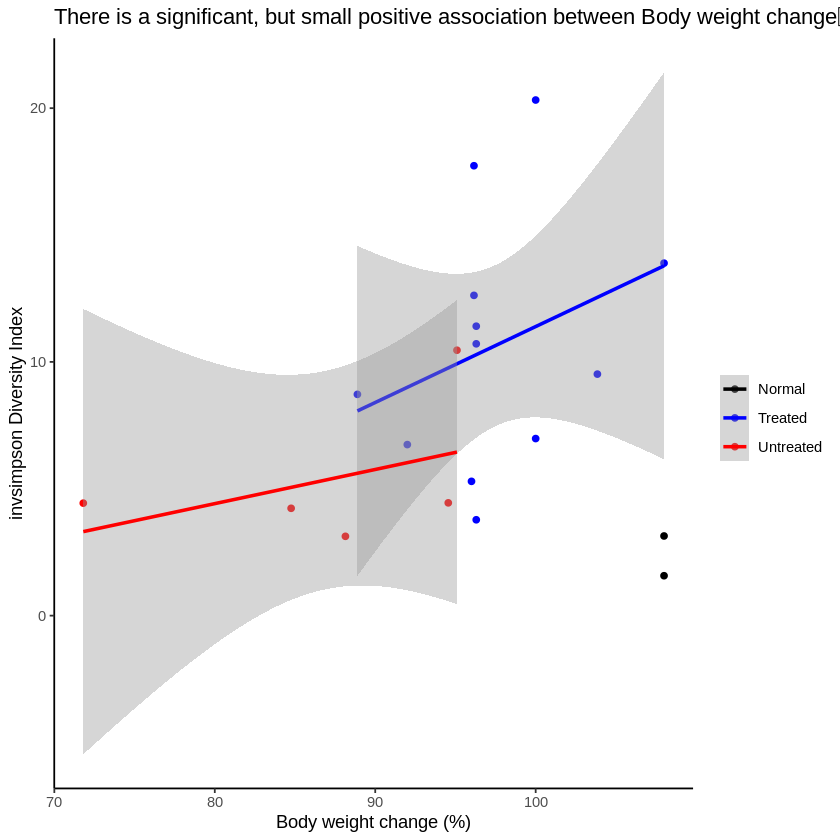

In [ ]:
ggplot(meta_alpha, aes(x=Body_WC, y=invsimpson, color=dx)) +
	geom_point() +
	geom_smooth(method="lm") +
	scale_color_manual(name=NULL,
		values=c("black", "blue", "red"),
		#breaks=c("normal", "adenoma", "cancer"),
		labels=c("Normal", "Treated", "Untreated")) +
	labs(title="There is a significant, but small positive association between Body weight change\and their simpson diversity",
		x="Body weight change (%)",
		y="invsimpson Diversity Index") +
	theme_classic()
ggsave("invsimpson Diversity Index_BWC.png", width = 10, height = 10, dpi = 300)

Is there a significant association between the number of OTUs in fecal samples and their BWC? Run the test and show a plot of the relevant fit of the data.

In [ ]:
#lm_sobs_Body_WC_Fecal_b <- lm(sobs~Body_WC+Fecal_b, data=meta_alpha)
#summary(lm_sobs_Body_WC_Fecal_b)

In [ ]:
lm_sobs_Stool_con_Fecal_b <- lm(sobs~Stool_con+Fecal_b, data=meta_alpha)
summary(lm_sobs_Stool_con_Fecal_b)


Call:
lm(formula = sobs ~ Stool_con + Fecal_b, data = meta_alpha)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.322 -27.600  -1.953  21.923  84.179 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   334.07      16.23  20.579 6.16e-13 ***
Stool_con      15.94      12.59   1.267   0.2234    
Fecal_b       -32.36      11.79  -2.745   0.0144 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 40.19 on 16 degrees of freedom
Multiple R-squared:  0.3471,	Adjusted R-squared:  0.2655 
F-statistic: 4.253 on 2 and 16 DF,  p-value: 0.03301


The effect of Fecal bleeding is statistically significant, but not with the stool consistency.

Returning to the scatter plot showing the positive relationship between invsimpson diversity and BWC, add an annotation to the field of the plot that indicates the Spearman rho value and p-value. To do this you will need to parse the output of cor.test and use the geom_text function. You can also use paste and round to format the numbers to look nice. Use the ? function and google if you run into a problem.

Warning message in cor.test.default(meta_alpha$invsimpson, meta_alpha$Body_WC, method = "spearman"):
“Cannot compute exact p-value with ties”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


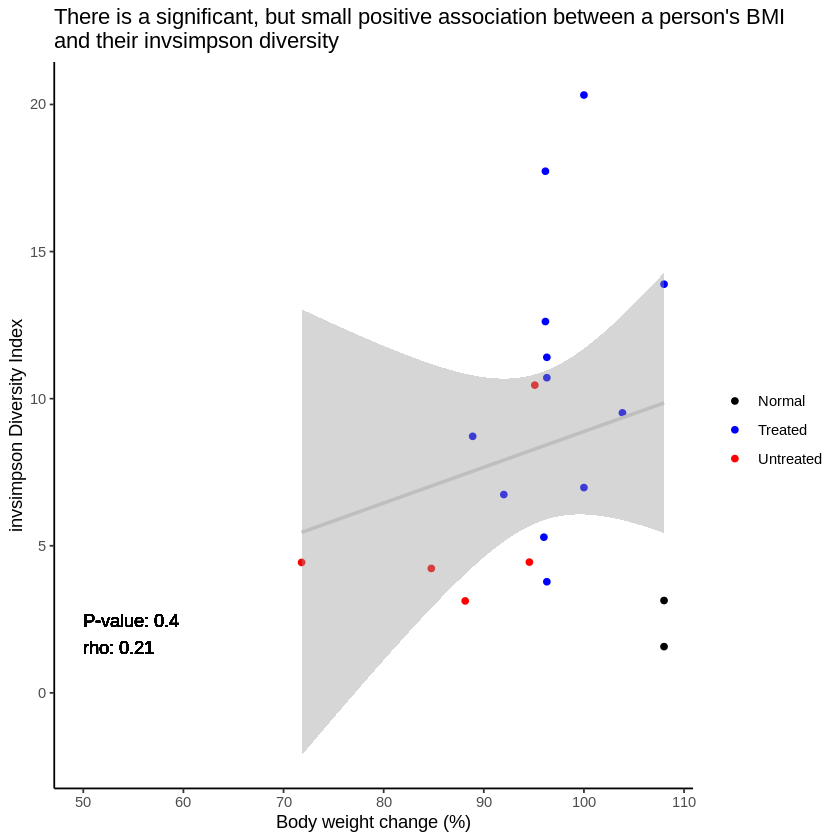

In [ ]:
test <- cor.test(meta_alpha$invsimpson, meta_alpha$Body_WC, method="spearman")
p <- paste("P-value:", round(test$p.value, digits=2))
rho <- paste("rho:", round(test$estimate, digits=2))
annotation <- paste(p, rho, sep="\n")

ggplot(meta_alpha, aes(x=Body_WC, y=invsimpson, color=dx)) +
	geom_point() +
	geom_smooth(method="lm", color="gray") +
	geom_text(aes(x=50, y=2, label=annotation), color="black", hjust = "left") +
	scale_color_manual(name=NULL,
		values=c("black", "blue", "red"),
		#breaks=c("normal", "adenoma", "cancer"),
		labels=c("Normal", "Treated", "Untreated")) +
	labs(title="There is a significant, but small positive association between a person's BMI\nand their invsimpson diversity",
		x="Body weight change (%)",
		y="invsimpson Diversity Index") +
	theme_classic()
ggsave("invsimpson Diversity Index_BWC_spearman.png", width = 10, height = 10, dpi = 300)

In [ ]:
#lm_sobs_Stool_con_Colon_length <- lm(sobs~Stool_con+Colon_length, data=meta_alpha)
#summary(lm_sobs_Stool_con_Colon_length)